In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv",encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
##Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
d=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
d.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
d.rename(columns={'v1':'target','v2':'text'},inplace=True)
d.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
d['target']=encoder.fit_transform(d['target'])
d.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
d.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
d.duplicated().sum()

403

In [12]:
dd=d.drop_duplicates(keep='first')

In [13]:
dd.shape

(5169, 2)

In [14]:
dd['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

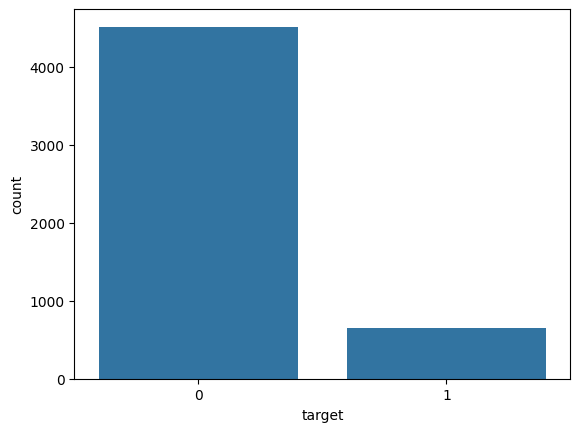

In [15]:
import seaborn as sns
sns.countplot(x='target',data = dd)

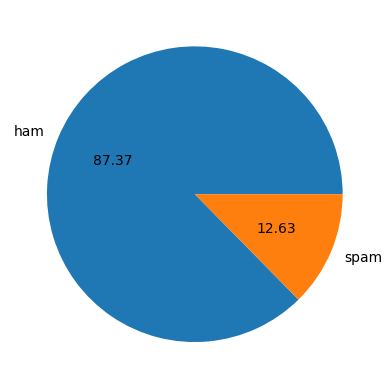

In [16]:
import matplotlib.pyplot as plt
plt.pie(dd['target'].value_counts(),labels=['ham','spam'],autopct = "%0.2f")
plt.show()

In [17]:
#Data is imbalanced 

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Jitendra
[nltk_data]     Lahre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
dd['num_characters']=dd['text'].apply(len)
dd.head()

C:\Users\Jitendra Lahre\AppData\Local\Temp\ipykernel_10904\3994853550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['num_characters']=dd['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
#num of words 

In [20]:
dd['num_words']=dd['text'].apply(lambda x:len(nltk.word_tokenize(x)))
dd.head()

C:\Users\Jitendra Lahre\AppData\Local\Temp\ipykernel_10904\2155003282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['num_words']=dd['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
dd['num_sentences']=dd['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
dd.head()

C:\Users\Jitendra Lahre\AppData\Local\Temp\ipykernel_10904\3686676217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['num_sentences']=dd['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
dd[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#ham
dd[dd['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#spam
dd[dd['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

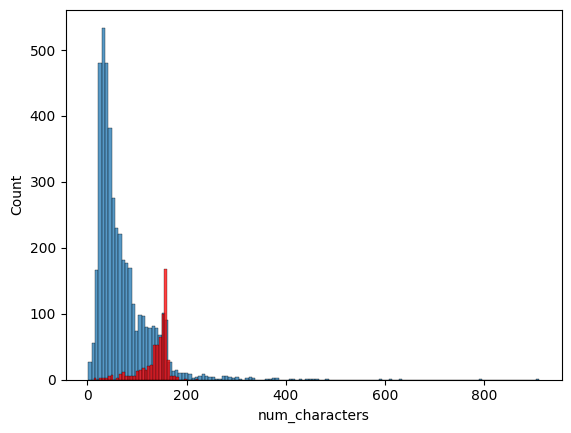

In [26]:
sns.histplot(dd[dd['target']==0]['num_characters'])
sns.histplot(dd[dd['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

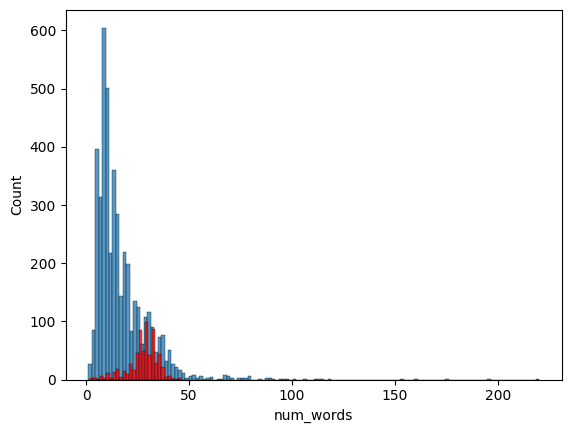

In [27]:
sns.histplot(dd[dd['target']==0]['num_words'])
sns.histplot(dd[dd['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

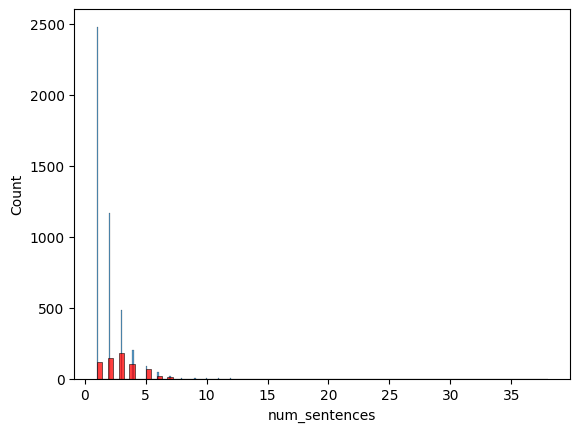

In [28]:
sns.histplot(dd[dd['target']==0]['num_sentences'])
sns.histplot(dd[dd['target']==1]['num_sentences'],color='red')

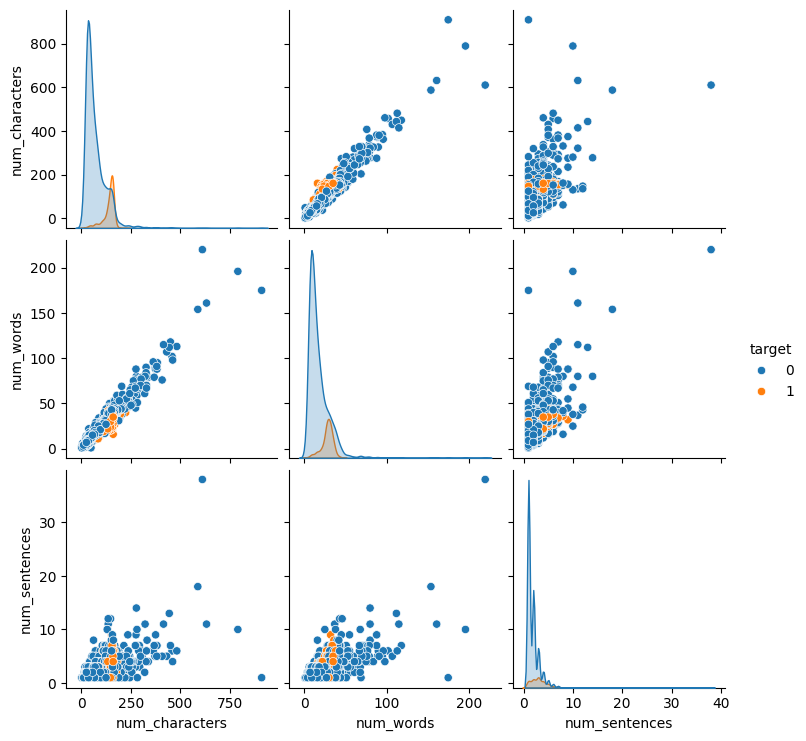

In [29]:
sns.pairplot(dd,hue='target')

In [30]:
import numpy as np

In [47]:
#Text Preprocessing

In [31]:
from nltk.corpus import stopwords

In [32]:
import nltk

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Jitendra
[nltk_data]     Lahre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
import string
import matplotlib.pyplot as plt

In [36]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
#stemming
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()
ps.stem('loving')

'love'

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text =y[:]
    y.clear()
    for i in text:
        if i  not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text =y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [39]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [29]:
dd['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [40]:
dd['transfrom_text']=dd['text'].apply(transform_text)
dd.head()

C:\Users\Jitendra Lahre\AppData\Local\Temp\ipykernel_10904\4014023845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['transfrom_text']=dd['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transfrom_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc = wc.generate(dd[dd['target']==1]['transfrom_text'].str.cat(sep=" "))

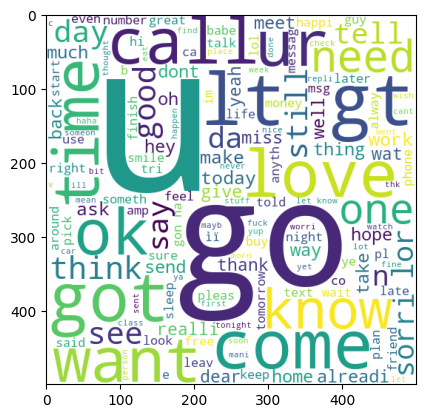

In [58]:
plt.imshow(spam_wc)

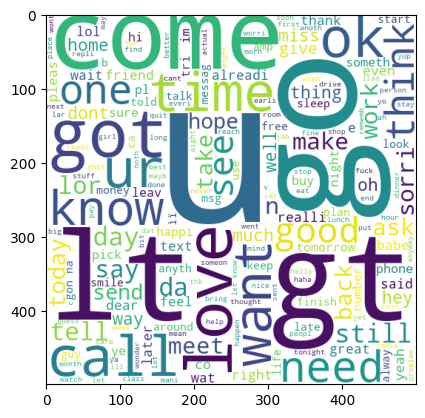

In [43]:
ham_wc = wc.generate(dd[dd['target']==0]['transfrom_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [44]:
spam_corpus=[]
for msg in dd[dd['target']==1]['transfrom_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [45]:
len(spam_corpus)

9939

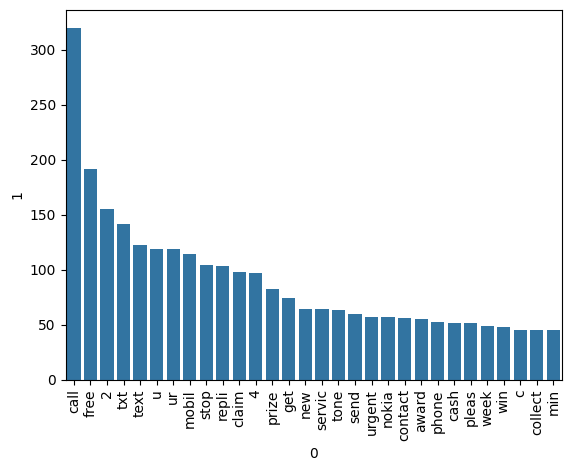

In [46]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
ham_corpus=[]
for msg in dd[dd['target']==0]['transfrom_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [48]:
len(ham_corpus)

35404

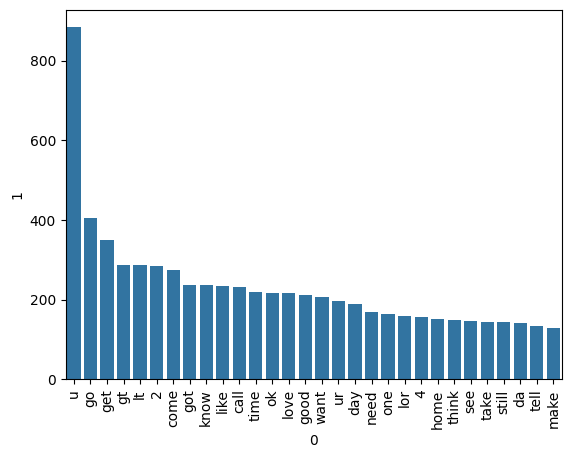

In [49]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [51]:
X = tfidf.fit_transform(dd['transfrom_text']).toarray()

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [53]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
X.shape

(5169, 3000)

In [55]:
y = dd['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
#GaussianNB

In [61]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [62]:
#MultinomialNB

In [63]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [64]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [65]:
#tfidf-->MNB

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [67]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dfc=DecisionTreeClassifier(max_depth=5)
lr=LogisticRegression(solver='liblinear',penalty='l1')
rf=RandomForestClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)



In [68]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dfc,
    'LR':lr,
    'RF':rf,
    'ETC':etc
   

}

In [69]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [70]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.9274193548387096)

In [71]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


In [169]:
algo_check  = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [170]:
algo_check

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
6,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
4,LR,0.951644,0.940000
3,DT,0.936170,0.846154


In [171]:
algo_check1 = pd.melt(algo_check,id_vars ="Algorithm")

In [172]:
algo_check1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,LR,Accuracy,0.951644
6,DT,Accuracy,0.936170
7,KN,Precision,1.000000
8,NB,Precision,1.000000
9,RF,Precision,1.000000


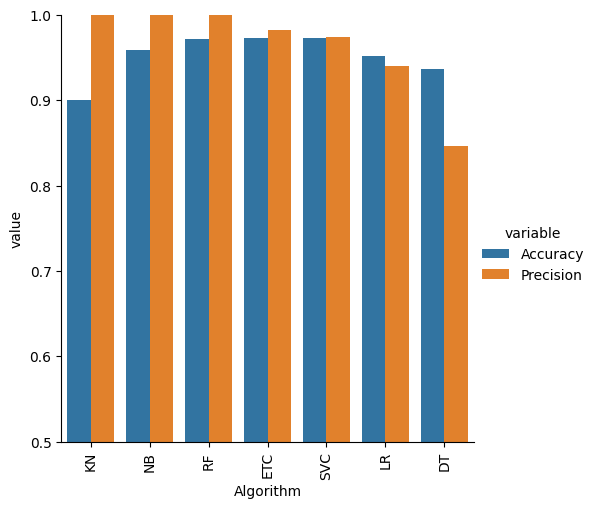

In [173]:
sns.catplot(x = 'Algorithm',y='value',
            hue = 'variable',data=algo_check1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [219]:
algo_check2  = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [220]:
algo_check2

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
6,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
0,SVC,0.969052,0.927419
3,DT,0.930368,0.836735


In [221]:
new_df  =algo_check.merge(algo_check2,on='Algorithm')

In [222]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.969052,0.927419
5,LR,0.951644,0.940000,0.967118,0.964286
6,DT,0.936170,0.846154,0.930368,0.836735


In [223]:
algo_check3  = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaled':accuracy_scores,'Precision_scaled':precision_scores}).sort_values('Precision_scaled',ascending=False)

In [224]:
new_df2  =new_df.merge(algo_check3,on='Algorithm')

In [225]:
new_df2

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaled,Precision_scaled
0,KN,0.900387,1.000000,0.905222,0.976190,0.905222,0.976190
1,NB,0.959381,1.000000,0.978723,0.946154,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.969052,0.927419,0.969052,0.927419
5,LR,0.951644,0.940000,0.967118,0.964286,0.967118,0.964286
6,DT,0.936170,0.846154,0.930368,0.836735,0.930368,0.836735


In [226]:
#votingClassifier

In [72]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [73]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [74]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [231]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.968


In [75]:
#Stacking Classifier
estimators =[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [76]:
from sklearn.ensemble import StackingClassifier

In [77]:
clf = StackingClassifier(estimators=estimators , final_estimator=final_estimator)

In [79]:
clf.fit(X_train,y_train)
y_pred1=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred1))
print("Precision",precision_score(y_test,y_pred1))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [80]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [81]:
import pickle 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


In [82]:
#Sample test data and corresponding labels (replace with your actual data)
X_train = ["Sample text 1", "Sample text 2","Sample text 3"]
y_train = [0,1,0] #Example labels (0 for negative, 1 for positive)


In [84]:
#Create and Train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase = True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

In [85]:
#Create and train the naive_bayes classifier
mnb=MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [86]:
#Save the trained Tf-IDF vectorizer and Naive bayes model to files
with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)

with open('model.pkl','wb') as model_file:
    pickle.dump(mnb,model_file)